# 实战

KNN 一般步骤

1. 收集数据：可以使用爬虫进行数据的收集，也可以使用第三方提供的免费或收费的数据。一般来讲，数据放在txt文本文件中，按照一定的格式进行存储，便于解析及处理。
2. 准备数据：使用Python解析、预处理数据。
3. 分析数据：可以使用很多方法对数据进行分析，例如使用Matplotlib将数据可视化。
4. 测试算法：计算错误率。
5. 使用算法：错误率在可接受范围内，就可以运行k-近邻算法进行分类。

## 题目描述

海伦女士一直使用在线约会网站寻找适合自己的约会对象。尽管约会网站会推荐不同的任选，但她并不是喜欢每一个人。经过一番总结，她发现自己交往过的人可以进行如下分类：

- 不喜欢的人
- 魅力一般的人
- 极具魅力的人

海伦收集约会数据已经有了一段时间，她把这些数据存放在文本文件dataset.txt中，每个样本数据占据一行，总共有1000行.

海伦收集的样本数据主要包含以下3种特征：

1. 每年获得的飞行常客里程数
2. 玩视频游戏所消耗时间百分比
3. 每周消费的冰淇淋公升数

## 数据准备

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./dataset.txt', sep='\t', header=None)
data

,0,1,2,3
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike
...,...,...,...,...
995,11145,3.410627,0.631838,smallDoses
996,68846,9.974715,0.669787,didntLike
997,26575,10.650102,0.866627,largeDoses
998,48111,9.134528,0.728045,largeDoses


In [2]:
# 所有类别
labels = data.iloc[:, 3].unique().tolist()
data.iloc[:, 3] = data.iloc[:, 3].apply(lambda x: labels.index(x))
data

,0,1,2,3
0,40920,8.326976,0.953952,0
1,14488,7.153469,1.673904,1
2,26052,1.441871,0.805124,2
3,75136,13.147394,0.428964,2
4,38344,1.669788,0.134296,2
...,...,...,...,...
995,11145,3.410627,0.631838,1
996,68846,9.974715,0.669787,2
997,26575,10.650102,0.866627,0
998,48111,9.134528,0.728045,0


In [3]:
X = pd.DataFrame(data, columns=[0, 1, 2])
y = pd.DataFrame(data, columns=[3])
X, y

(         0          1         2
 0    40920   8.326976  0.953952
 1    14488   7.153469  1.673904
 2    26052   1.441871  0.805124
 3    75136  13.147394  0.428964
 4    38344   1.669788  0.134296
 ..     ...        ...       ...
 995  11145   3.410627  0.631838
 996  68846   9.974715  0.669787
 997  26575  10.650102  0.866627
 998  48111   9.134528  0.728045
 999  43757   7.882601  1.332446
 
 [1000 rows x 3 columns],
      3
 0    0
 1    1
 2    2
 3    2
 4    2
 ..  ..
 995  1
 996  2
 997  0
 998  0
 999  0
 
 [1000 rows x 1 columns])

## 数据可视化

In [4]:
data.loc[data[3] == 0, 0]

0      40920
6      35948
7      42666
9      35483
19     28488
       ...  
977    34143
990    27750
997    26575
998    48111
999    43757
Name: 0, Length: 327, dtype: int64

Text(0, 0.5, 'Percentage of time spent playing video games')

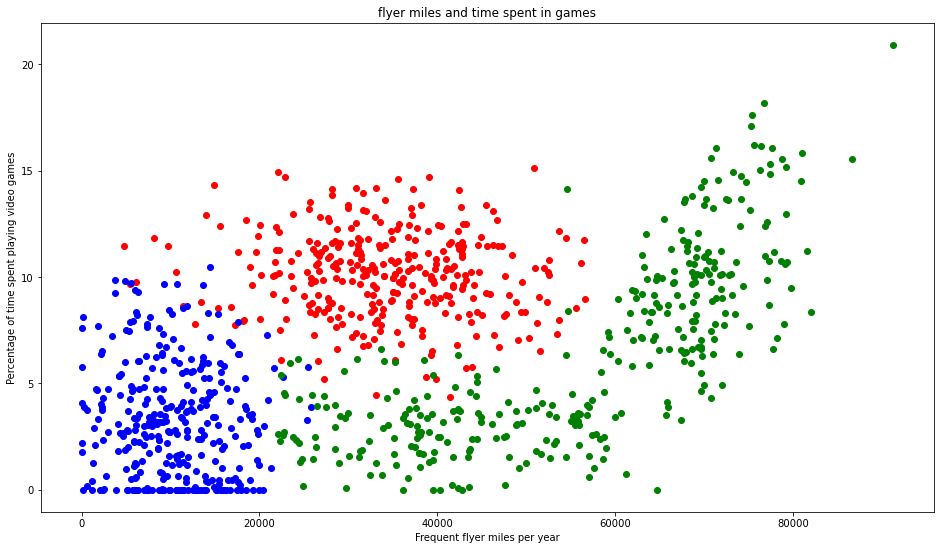

In [5]:
# 每年获得的飞行常客里程数与玩视频游戏所消耗时间占比
plt.figure(figsize=(16, 9))
plt.scatter(data.loc[data[3] == 0, 0], data.loc[data[3] == 0, 1], marker='o', c='r')
plt.scatter(data.loc[data[3] == 1, 0], data.loc[data[3] == 1, 1], marker='o', c='b')
plt.scatter(data.loc[data[3] == 2, 0], data.loc[data[3] == 2, 1], marker='o', c='g')
plt.title('flyer miles and time spent in games')
plt.xlabel('Frequent flyer miles per year')
plt.ylabel('Percentage of time spent playing video games')

Text(0, 0.5, 'Liters of ice cream consumed per week')

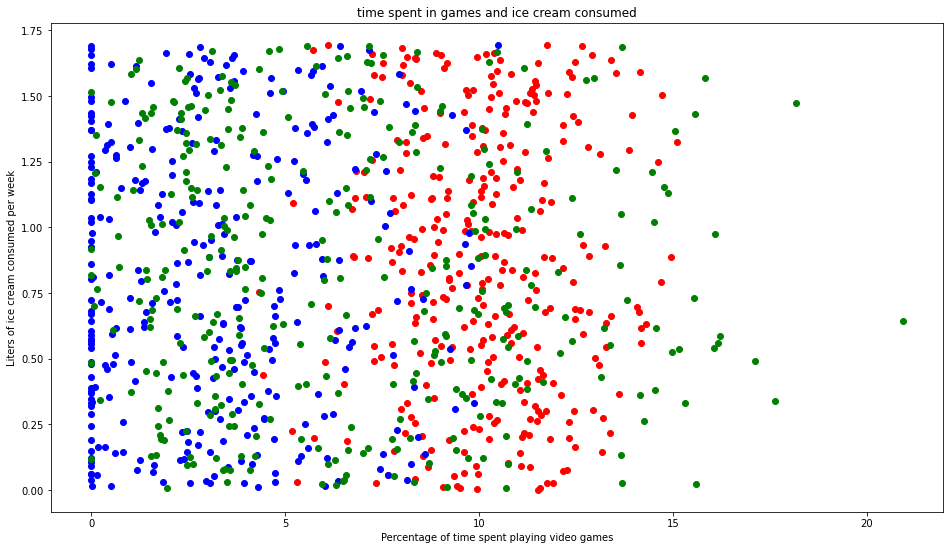

In [6]:
# 玩视频游戏所消耗时间占比与每周消费的冰激淋公升数
plt.figure(figsize=(16, 9))
plt.scatter(data.loc[data[3] == 0, 1], data.loc[data[3] == 0, 2], marker='o', c='r')
plt.scatter(data.loc[data[3] == 1, 1], data.loc[data[3] == 1, 2], marker='o', c='b')
plt.scatter(data.loc[data[3] == 2, 1], data.loc[data[3] == 2, 2], marker='o', c='g')
plt.title('time spent in games and ice cream consumed')
plt.xlabel('Percentage of time spent playing video games')
plt.ylabel('Liters of ice cream consumed per week')

Text(0, 0.5, 'Liters of ice cream consumed per week')

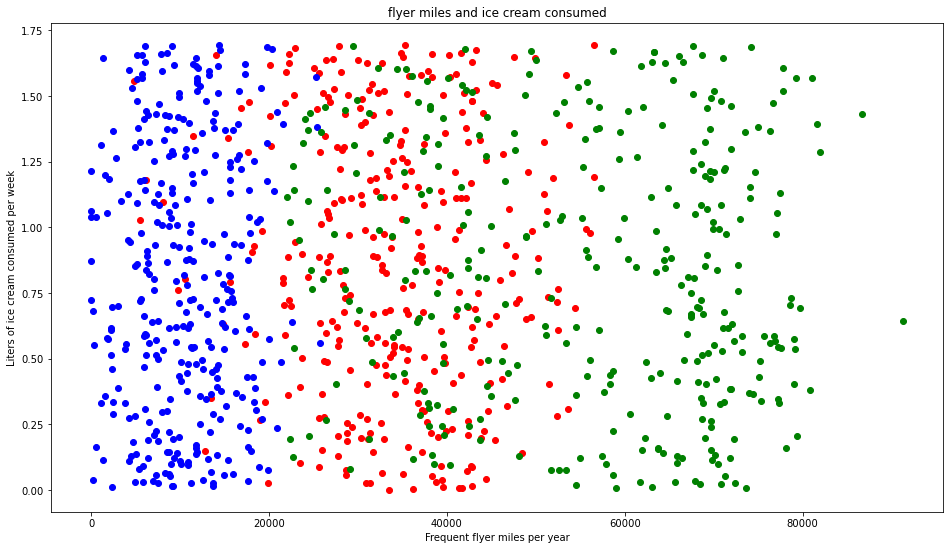

In [7]:
# 每年获得的飞行常客里程数与每周消费的冰激淋公升数
plt.figure(figsize=(16, 9))
plt.scatter(data.loc[data[3] == 0, 0], data.loc[data[3] == 0, 2], marker='o', c='r')
plt.scatter(data.loc[data[3] == 1, 0], data.loc[data[3] == 1, 2], marker='o', c='b')
plt.scatter(data.loc[data[3] == 2, 0], data.loc[data[3] == 2, 2], marker='o', c='g')
plt.title('flyer miles and ice cream consumed')
plt.xlabel('Frequent flyer miles per year')
plt.ylabel('Liters of ice cream consumed per week')

## 数据处理：数据归一化

可以使用欧氏距离公式计算样本之间的距离，但是方程中数值最大或数值差值最大的属性的计算结果将对整体影响很大；即上面三个特征中，每年飞行常客里程数对于计算结果的影响将远远大于其他两个。对于权重相同的特征，需要对其进行归一化处理。

通常采用数值归一化的方法处理取值范围不同的特征值，将任意取值范围的特征值转化为 $0 \sim 1$ 区间值：
$$
newVal = \frac{oldVal - min}{max - min} 
$$

In [8]:
minn, maxx = X.min(), X.max()
minn, maxx

(0    0.000000
 1    0.000000
 2    0.001156
 dtype: float64,
 0    91273.000000
 1       20.919349
 2        1.695517
 dtype: float64)

In [9]:
X = (X - minn) / (maxx - minn)
X

,0,1,2
0,0.448325,0.398051,0.562334
1,0.158733,0.341955,0.987244
2,0.285429,0.068925,0.474496
3,0.823201,0.628480,0.252489
4,0.420102,0.079820,0.078578
...,...,...,...
995,0.122106,0.163037,0.372224
996,0.754287,0.476818,0.394621
997,0.291159,0.509103,0.510795
998,0.527111,0.436655,0.429005


## 测试算法：验证分类器

In [10]:
def basic_knn_classify(X, y, testset, k=3):
    diff = np.tile(testset, (X.shape[0], 1)) - X
    dist = np.sum(diff ** 2, axis=1) ** 0.5
    sorted_dist_idx = list(dist.argsort())
    class_count = dict()
    for i in range(k):
        vote = y.iat[sorted_dist_idx[i], 0]
        class_count[vote] = class_count.get(vote, 0) + 1
    sorted_class_count = sorted(class_count.items(), key=lambda x:x[1], reverse=True)
    return sorted_class_count[0][0]

数据集并没有按特定规则排序，使用前 $90\%$ 做训练集，后 $10\%$ 做测试集，经过调参测试后 $k = 5$ 时可得最小错误率

In [11]:
m = int(X.shape[0] * 0.1)
X_train, y_train = X[:-m], y[:-m]
error = 0
for i in range(X.shape[0] - m, X.shape[0]):
    result = basic_knn_classify(X_train, y_train, X.loc[i], 5)
    reality = y.iat[i, 0]
    # print(f'result: {result}, reality: {reality}')
    error += (result != reality)
f'rate of error: {error / m * 100} %'

'rate of error: 5.0 %'

分别将不同段的数据做测试集，其他做训练集，查看错误率

In [12]:
step = int(X.shape[0] * 0.1)
for i in range(0, X.shape[0], step):
    X_train, y_train = X.drop(labels=range(i, i+step)), y.drop(labels=range(i, i+step))
    X_test, y_test = X[i:i+step], y[i:i+step]
    error = 0
    for j in range(step):
        result = basic_knn_classify(X_train, y_train, X_test[j:j+1], 5)
        reality = y_test.iat[j, 0]
        error += (result != reality)
    print(f'test with [{i}, {i+step}] rate of error: {error / step * 100} %')

test with [0, 100] rate of error: 5.0 %
test with [100, 200] rate of error: 9.0 %
test with [200, 300] rate of error: 7.000000000000001 %
test with [300, 400] rate of error: 7.000000000000001 %
test with [400, 500] rate of error: 5.0 %
test with [500, 600] rate of error: 5.0 %
test with [600, 700] rate of error: 4.0 %
test with [700, 800] rate of error: 0.0 %
test with [800, 900] rate of error: 2.0 %
test with [900, 1000] rate of error: 5.0 %


## 预测
取 $[0, 699] \cup [800, 899]$ 做训练集，对给定数据进行预测

In [13]:
X_train, y_train = X.drop(labels=range(700, 800)), y.drop(labels=range(700, 800))
testset = pd.DataFrame([[44000, 12, 0.5]])

# 测试集归一化
testset = (testset - minn) / (maxx - minn)
labels[basic_knn_classify(X_train, y_train, testset, 5)]

'largeDoses'